# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



# Desarrollo de Actividades


### Importacion de las dependencias
 Se importan bibliotecas necesarias para el analisis y visualizacion de datos:
* `import pandas as pd` : permite la manipulacion y el analisis de datos.
* `import matplotlib.pyplot as plt` : Permite la creacion de graficos estadisticos.

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt


#### Carga de csv
Se utiliza `read_csv` de Pandas para leer el archivo csv que contiene el dataset.

In [6]:
df = pd.read_csv("datasets_calificaciones.csv")


#### Acceder a los primeros 10 elementos: 
Con el metodo `head(10)` se puede acceder a los primeros 10 elementos del DataFrame.

In [7]:
df.head(10)

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8,7.5,9,95%
1,carlos lópez,fisica,6.2,7,NaN,88%
2,maría gómez,quimica,9,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6,7,75
4,laura vargas,matematicas,,9.2,8.5,92%
5,javier soto,fisica,5.8,6.5,6,80%
6,sofia díaz,ciencias sociales,9.5,9.1,,98%
7,miguel fernández,literatura universal,8,7.8,8.2,85%
8,valentina ruiz,matematicas,7,,7.8,90%
9,diego castro,fisica,6.8,7.2,7.5,93%


#### Exploracion inicial
Se utiliza `df.info()` para obtener una vista general de la estructura del DataFrame:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


#### Descripciones Estadistica de la DataFrame
Con la funcion `df.describe()` se obtiene un resumen de las estadisticas para cada columna numerica

In [9]:
df.describe()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
count,100,100,95,90,89,100
unique,96,7,49,45,46,35
top,mateo díaz,matematicas,,7.5,9.5,99%
freq,2,25,7,5,4,5


#### Identificacion de Valores nulos
Se identifican la cantidad de valores nulos en cada columna de DataFrame

In [10]:
df.isnull().sum()

estudiante     0
Materia        0
Parcial 1      5
Parcial 2     10
Final         11
Asistencia     0
dtype: int64

#### Tratamiento de valores nulos
Se reemplazan los valores faltantes o vacios en las columnas por 0

In [18]:
df[['Parcial 1', 'Parcial 2', 'Final']] = df[['Parcial 1', 'Parcial 2', 'Final']].replace(['', ' '], 0).fillna(0)

* Luego de la conversion se hace una sumatoria total de valores nulos para verificar la ausencia de estos

In [19]:
df.isnull().sum()

estudiante    0
Materia       0
Parcial 1     0
Parcial 2     0
Final         0
Asistencia    0
dtype: int64

#### Conversion a Tipo Numerico(`float`)
En el `df.info` se noto que las columnas se reconocen como **object** lo cual significa que se los toma como tipo texto, dado a lo asignado se recomienda pasar a tipo `float` para que los datos sean compatibles con el analisis y visualizaciones

In [23]:
df[['Parcial 1', 'Parcial 2', 'Final']] = df[['Parcial 1', 'Parcial 2', 'Final']].astype(float)

#### Analisis de la DataFrame
Luego de la conversion, volvemos a analisas nuesta DataFrame para contemplar los cambios hechos.

In [24]:
df.head(5)

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8.0,7.5,9.0,95%
1,carlos lópez,fisica,6.2,7.0,0.0,88%
2,maría gómez,quimica,9.0,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6.0,7.0,75
4,laura vargas,matematicas,0.0,9.2,8.5,92%


#### Normalizacion de la columna Asistencia
Limpieza de la columna y conversion de tipo texto a entero para facilitar luego los calculos estadisticos y graficos, tambien se aseguro que el rango maximo valido sea de 100

In [30]:
df['Asistencia'] = df['Asistencia'].replace("[\%]", "", regex=True).astype(int)
df.loc[df['Asistencia'] > 100, 'Asistencia'] = 100
df.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\%'
<>:1: SyntaxWarning: invalid escape sequence '\%'
C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_19172\4268332747.py:1: SyntaxWarning: invalid escape sequence '\%'
  df['Asistencia'] = df['Asistencia'].replace("[\%]", "", regex=True).astype(int)


,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8.0,7.5,9.0,95
1,carlos lópez,fisica,6.2,7.0,0.0,88
2,maría gómez,quimica,9.0,8.8,9.5,100
3,pedro rodríguez,historia,7.5,6.0,7.0,75
4,laura vargas,matematicas,0.0,9.2,8.5,92


#### Normalizacion de texto
Se normalizan las columnas `estudiante` y `Materia` dandoles un formato de titulo (mayuscula en la primera letra de cada palabra)

In [35]:
df['Materia'] = df['Materia'].str.title()
df['estudiante'] = df['estudiante'].str.title()
df.head(10)

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.0,7.5,9.0,95
1,Carlos López,Fisica,6.2,7.0,0.0,88
2,María Gómez,Quimica,9.0,8.8,9.5,100
3,Pedro Rodríguez,Historia,7.5,6.0,7.0,75
4,Laura Vargas,Matematicas,0.0,9.2,8.5,92
5,Javier Soto,Fisica,5.8,6.5,6.0,80
6,Sofia Díaz,Ciencias Sociales,9.5,9.1,0.0,98
7,Miguel Fernández,Literatura Universal,8.0,7.8,8.2,85
8,Valentina Ruiz,Matematicas,7.0,0.0,7.8,90
9,Diego Castro,Fisica,6.8,7.2,7.5,93


### Calcular numeros estadisticos finales
Con la limpieza y normalizacion ya hechos ahora podemos ver las estadisticas con mas claridad

In [36]:
df.describe()

,Parcial 1,Parcial 2,Final,Asistencia
count,100.00000,100.000000,100.000000,100.000000
mean,6.89200,6.891000,6.710000,88.180000
std,2.79804,2.787566,3.043075,8.445165
min,0.00000,0.000000,0.000000,70.000000
25%,6.37500,6.500000,6.375000,81.750000
50%,7.60000,7.500000,7.450000,88.500000
75%,8.80000,8.800000,8.825000,96.000000
max,9.90000,9.900000,9.900000,100.000000


#### Promedio de calificaciones por Materia
Se utiliza `groupby()` para agrupar los datos por la columna Materia y se calcula el promedio de cada tipo de calificación (Parcial 1, Parcial 2 y Final)

In [44]:
calificaciones_materia =df.groupby('Materia')[['Parcial 1','Parcial 2', 'Final']].mean()
print("Calificaciones por Materia:")
print("\n",calificaciones_materia)

Calificaciones por Materia:

                       Parcial 1  Parcial 2     Final
Materia                                             
Ciencias Sociales      9.500000   9.100000  0.000000
Fisica                 4.941667   5.870833  6.295833
Historia               7.375000   6.700000  6.166667
Literatura Universal   8.000000   7.800000  8.200000
Matematicas            6.208000   5.756000  7.208000
Programacion Basica    0.000000   5.900000  6.300000
Quimica                9.204167   9.195833  7.383333


#### Promedio de asistencia


In [39]:
promedio_asistencia = df['Asistencia'].mean()
print("El Promedio de asistencia es:", promedio_asistencia)

El Promedio de asistencia es: 88.18


#### Mejores Notas de Matematica

In [49]:
df[df['Materia'] == 'Matematicas'][['estudiante', 'Final']].sort_values('Final', ascending=False).head(10)


,estudiante,Final
60,Santino Torres,9.6
24,Máximo Castro,9.5
40,Felipe Vargas,9.4
80,Benjamín Castro,9.2
12,Martina Soto,9.1
0,Ana Pérez,9.0
32,Benicio Torres,8.9
52,Thiago Castro,8.8
92,Benicio Fernández,8.8
16,Abril Gómez,8.6


#### Promedio de Nota Final

In [52]:
promedio_nota_final = df['Final'].mean()
print("Promedio de nota final:", promedio_nota_final)

Promedio de nota final: 6.71


#### Nota Maxima y Minima por Materia

In [61]:
df.groupby('Materia')[['Final']].agg(['max','min'])

Final     
                       max  min
Materia                        
Ciencias Sociales      0.0  0.0
Fisica                 8.1  0.0
Historia               8.8  0.0
Literatura Universal   8.2  8.2
Matematicas            9.6  0.0
Programacion Basica    6.3  6.3
Quimica                9.9  0.0

### Graficos

####  Histograma de Notas Finales
Se utiliza un histograma para visualizar la distribución de las calificaciones finales de los estudiantes:

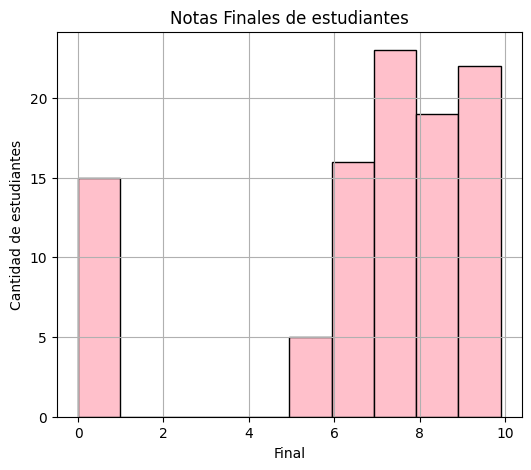

In [66]:
plt.figure(figsize=(6,5))
plt.hist(df['Final'], color='pink', edgecolor='black')
plt.title("Notas Finales de estudiantes")
plt.xlabel("Final")
plt.ylabel("Cantidad de estudiantes")
plt.grid(True)
plt.show()
